# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


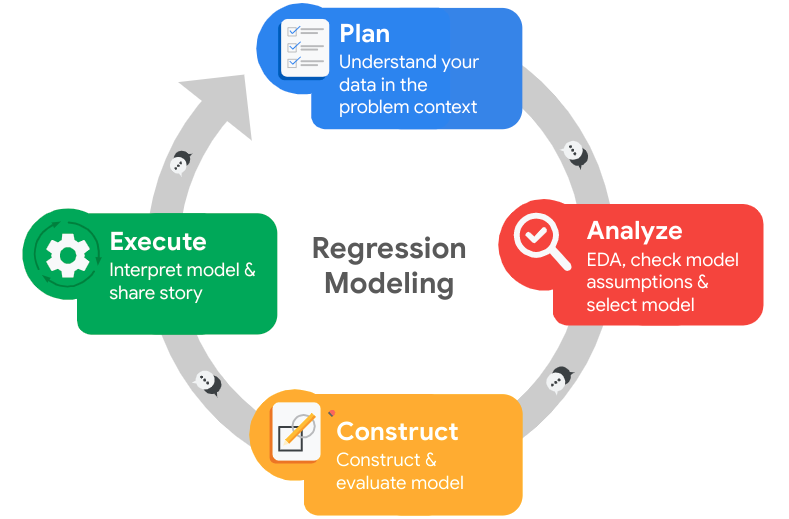

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




1. The HR department at Salifort Motors.
2. Whether an employee will leave the company or not.
3. The features in the dataset will help us to achieve the goal of whether an employee will stay in the company.
4. 
5. No ethical considerations.

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
#pd.set_option('display.max_columns', None)

from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, \
confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

import pickle


### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe

df0.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data

df0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data

df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names

df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed

df0 = df0.rename(columns = {'average_montly_hours' : 'average_monthly_hours',
                           'time_spend_company' : 'tenure',
                           'Work_accident' : 'work_accident',
                           'Department' : 'department'
                           })

# Display all column names after the update

df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values

df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates

df0.duplicated().sum()

3008

In [9]:
# Inspect some rows containing duplicates as needed

df0[df0.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed

df1 = df0.drop_duplicates(keep = 'first')

# Display first few rows of new dataframe as needed

df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_monthly_hours  11991 non-null  int64  
 4   tenure                 11991 non-null  int64  
 5   work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   department             11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


### Check outliers

Check for outliers in the data.

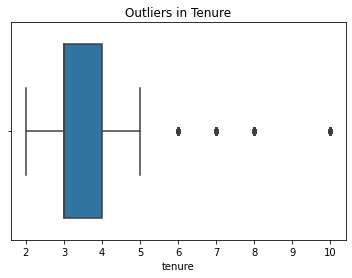

In [12]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers

sns.boxplot(df1['tenure'])
plt.title("Outliers in Tenure")
plt.show()


In [13]:
# Determine the number of rows containing outliers

percentile75 = df1['tenure'].quantile(0.75)

percentile25 = df1['tenure'].quantile(0.25)

iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("upper limit : ", upper_limit)
print("Lower limit : ", lower_limit)

outlier = df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)]

print("Number of rows that contain tenure outliers are : ", len(outlier))

upper limit :  5.5
Lower limit :  1.5
Number of rows that contain tenure outliers are :  824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [14]:
# Get numbers of people who left vs. stayed

print(df1['left'].value_counts())
print()

# Get percentages of people who left vs. stayed

print(df1['left'].value_counts(normalize = True))

0    10000
1     1991
Name: left, dtype: int64

0    0.833959
1    0.166041
Name: left, dtype: float64


In [15]:
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

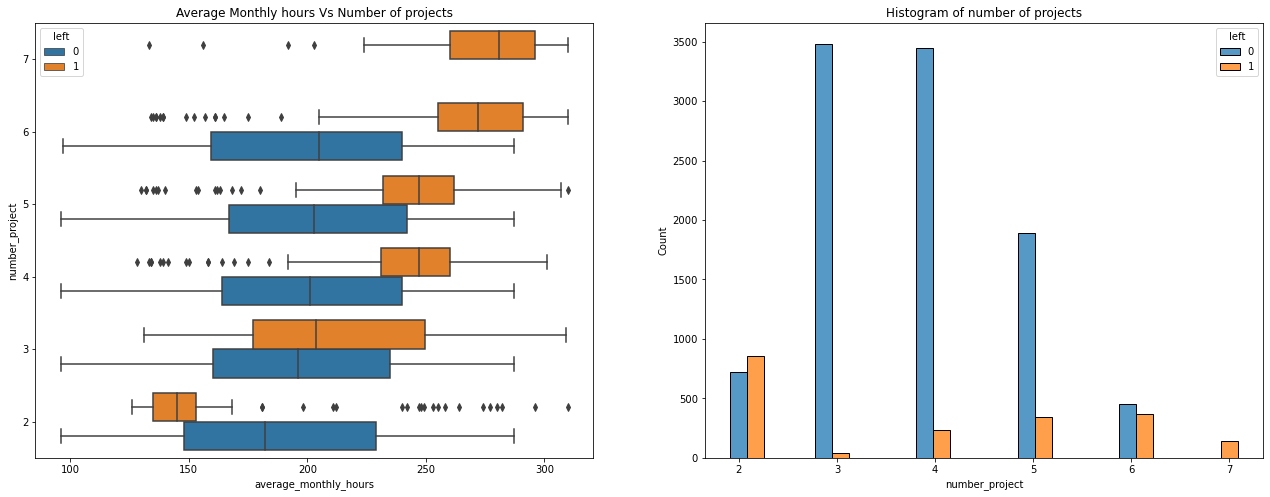

In [16]:
# Create a plot as needed

fig, ax = plt.subplots(1, 2, figsize = (22,8))

sns.boxplot(data = df1, x = 'average_monthly_hours', y = 'number_project', hue = 'left', ax = ax[0], orient = "h")
ax[0].invert_yaxis()
ax[0].set_title('Average Monthly hours Vs Number of projects')

sns.histplot(data = df1, x = 'number_project', hue = 'left', ax = ax[1], multiple = 'dodge', shrink = 2)
ax[1].set_title('Histogram of number of projects')

plt.show()

In [17]:
df1[df1['number_project'] == 7]['left'].value_counts()

1    145
Name: left, dtype: int64

Text(0.5, 1.0, 'Monthly hours by last evaluation score')

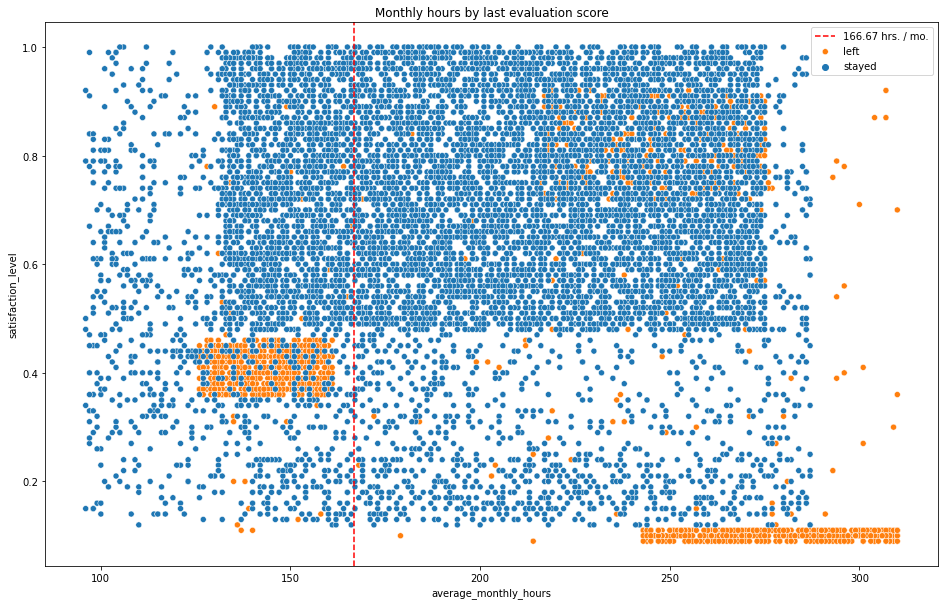

In [18]:
# Create a plot as needed

plt.figure(figsize = (16,10))

sns.scatterplot(data = df1, x = 'average_monthly_hours', y = 'satisfaction_level', hue = 'left')
plt.axvline(x = 166.67, color = 'red', label = '166.67 hrs. / mo.', ls = '--')
plt.legend(labels = ['166.67 hrs. / mo.', 'left', 'stayed'])
plt.title("Monthly hours by last evaluation score")

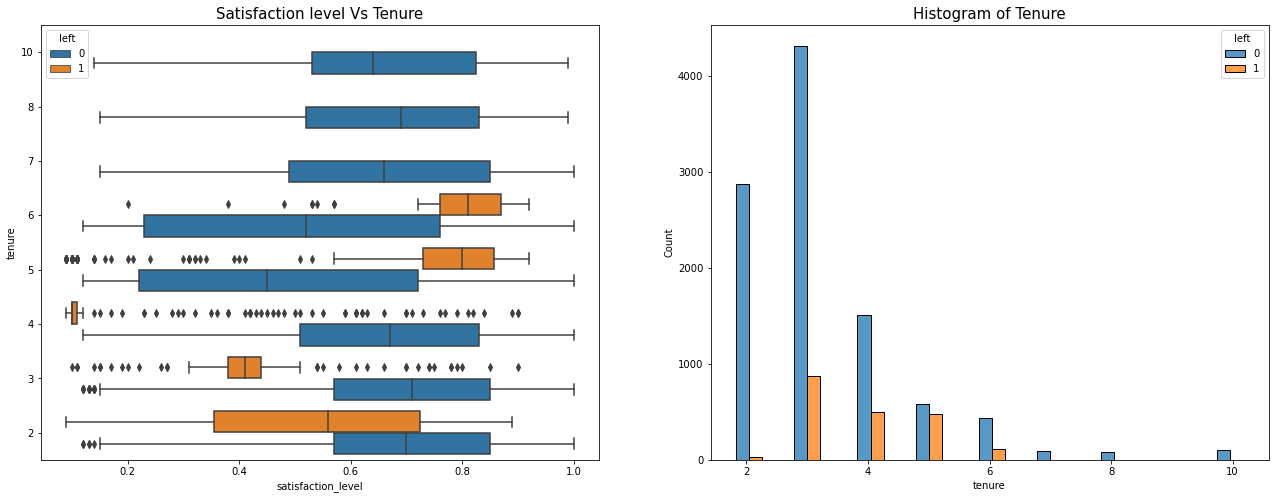

In [19]:
# Create a plot as needed

fig, ax = plt.subplots(1, 2, figsize = (22,8))

sns.boxplot(data = df1, x = 'satisfaction_level', y = 'tenure', hue = 'left', ax= ax[0], orient = "h")
ax[0].invert_yaxis()
ax[0].set_title("Satisfaction level Vs Tenure", fontsize = 15)

sns.histplot(data = df1, x = 'tenure', multiple = 'dodge', hue = 'left', shrink = 5)
ax[1].set_title("Histogram of Tenure", fontsize = 15)

plt.show()

In [20]:
df1.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


Text(0.5, 1.0, 'Tenure more than 6 years')

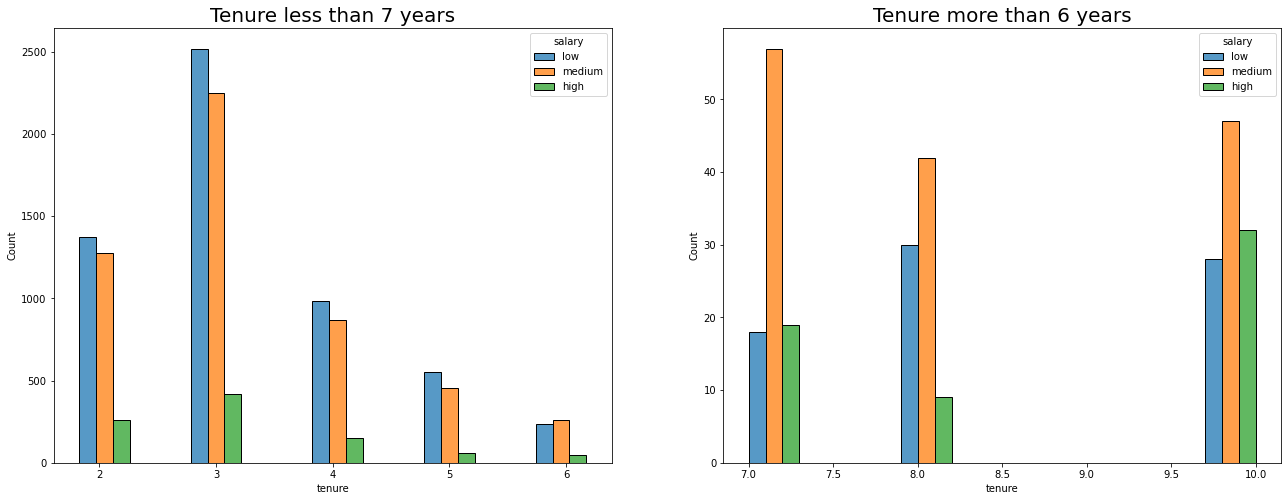

In [21]:
# Create a plot as needed

fig, ax = plt.subplots(1, 2, figsize = (22,8))

tenure_short = df1[df1['tenure'] < 7]
tenure_long = df1[df1['tenure'] > 6]

sns.histplot(data = tenure_short, x = 'tenure', hue = 'salary', hue_order = ['low', 'medium', 'high'], 
             multiple = 'dodge', shrink = 5, ax = ax[0])
ax[0].set_title("Tenure less than 7 years", fontsize = 20)

sns.histplot(data = tenure_long, x = 'tenure', hue = 'salary', hue_order = ['low', 'medium','high'], 
             multiple = 'dodge', shrink = 1, ax = ax[1])
ax[1].set_title("Tenure more than 6 years", fontsize = 20)

Text(0.5, 1.0, 'Monthly hours by last evaluation score')

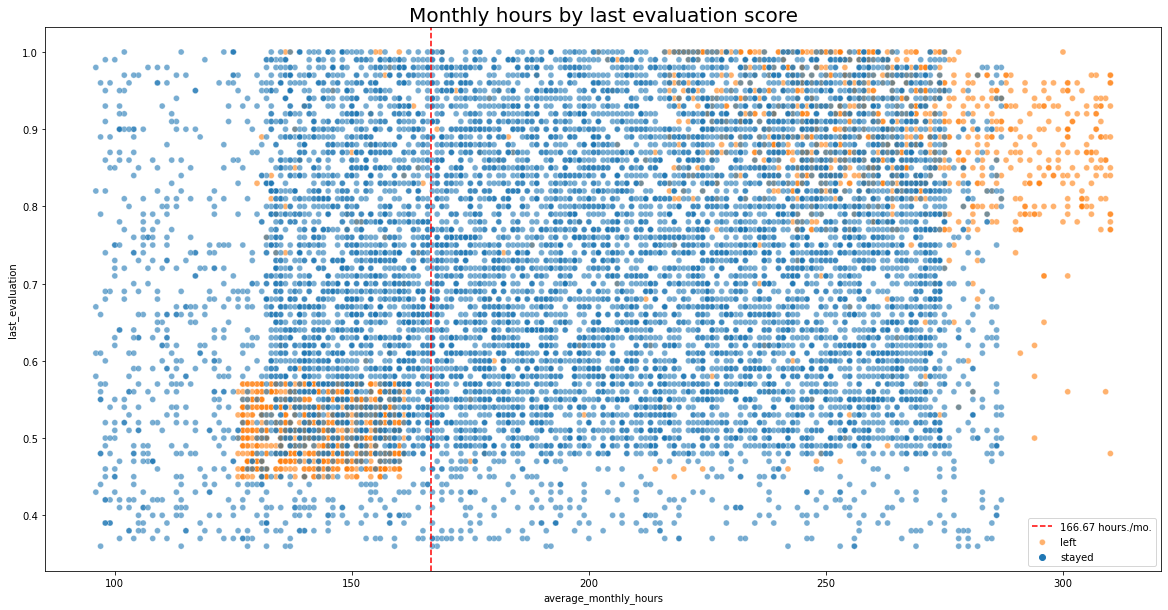

In [22]:
# Create a plot as needed

plt.figure(figsize = (20,10))

sns.scatterplot(data = df1, x= 'average_monthly_hours', y = 'last_evaluation', hue = 'left', alpha = 0.6)
plt.axvline( x = 166.67, ls = '--', color = 'red', label = '166.67 hours./mo.')
plt.legend(labels = ['166.67 hours./mo.', 'left', 'stayed'])
plt.title("Monthly hours by last evaluation score", fontsize = 20)

Text(0.5, 1.0, 'Monthly hours by promotion last 5 years')

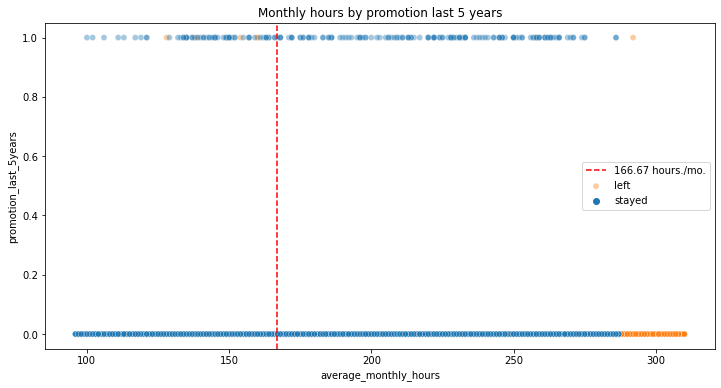

In [23]:
# Create a plot as needed

plt.figure(figsize = (12,6))

sns.scatterplot(data = df1, x = 'average_monthly_hours', y = 'promotion_last_5years', hue = 'left', alpha = 0.4)

plt.axvline(x = 166.67, ls = '--', color = 'red', label = '166.67 hours./mo.')
plt.legend(labels = ['166.67 hours./mo.', 'left', 'stayed'])
plt.title("Monthly hours by promotion last 5 years")

In [24]:
df1['department'].value_counts()

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: department, dtype: int64

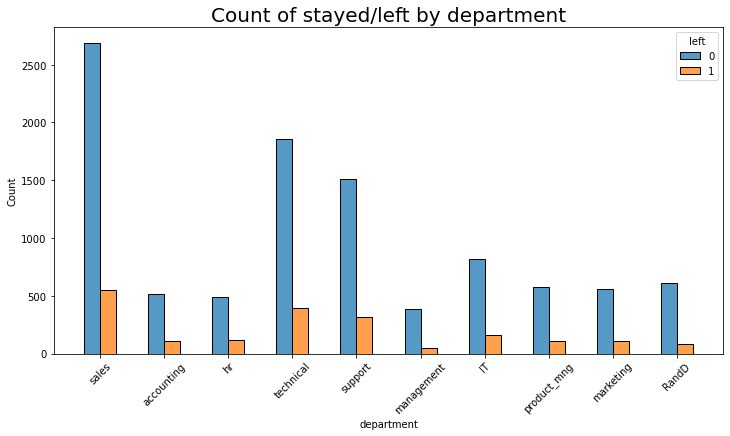

In [25]:
# Create a plot as needed

plt.figure(figsize = (12,6))
sns.histplot(data = df1, x = 'department', hue = 'left', multiple = 'dodge', shrink = 0.5)
plt.title("Count of stayed/left by department", fontsize = 20)
plt.xticks(rotation = '45')

plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

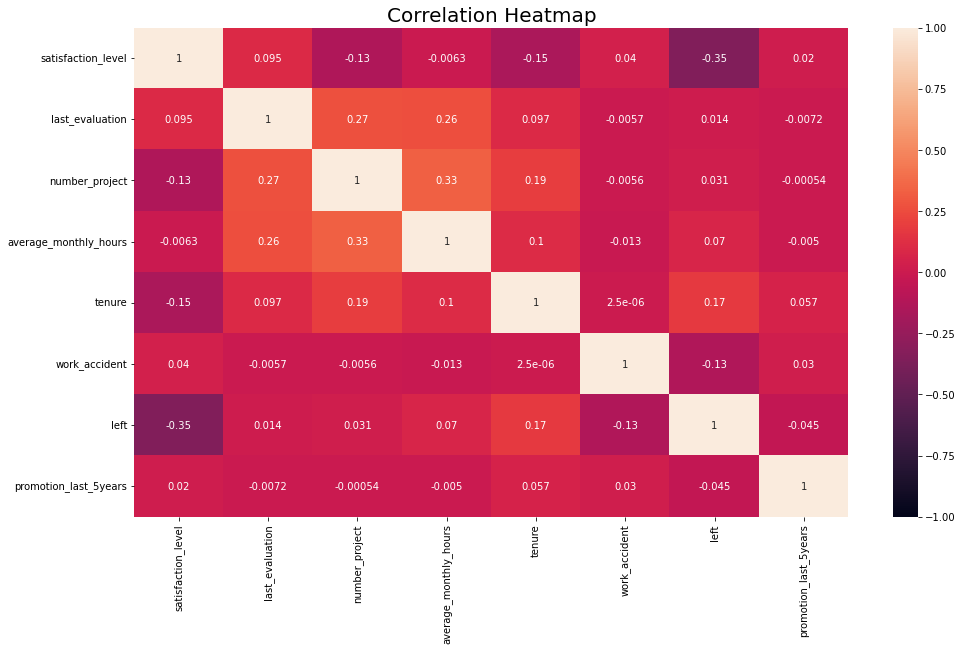

In [26]:
# Create a plot as needed

plt.figure(figsize = (16,9))

sns.heatmap(df1.corr(), annot = True, vmin = -1, vmax = 1)
plt.title("Correlation Heatmap", fontsize = 20)

### Insights

[What insights can you gather from the plots you created to visualize the data? Double-click to enter your responses here.]

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

[Double-click to enter your responses here.]

### Identify the types of models most appropriate for this task.

[Double-click to enter your responses here.]

### Modeling

Add as many cells as you need to conduct the modeling process.

In [27]:
df_enc = df1.copy()

df_enc['salary'] = df_enc['salary'].astype('category').cat.set_categories(['low','medium','high']).cat.codes

df_enc = pd.get_dummies(df_enc, drop_first = False)

df_enc.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


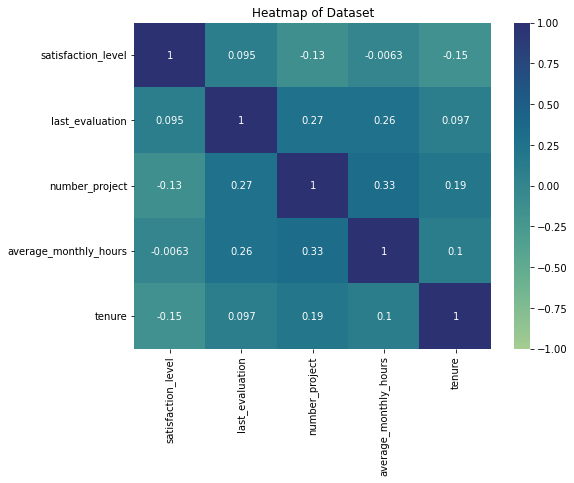

In [28]:
plt.figure(figsize = (8,6))

sns.heatmap(df_enc[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']].corr(), 
            annot = True, vmin = -1, vmax = 1, cmap = 'crest')

plt.title("Heatmap of Dataset")
plt.show()

In [29]:
df_logreg = df_enc[(df_enc['tenure'] >= lower_limit) & (df_enc['tenure'] <= upper_limit)]

df_logreg.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [30]:
y = df_logreg['left']

X = df_logreg.drop('left', axis = 1)

In [31]:
y.head()

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64

In [32]:
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,0,0,0,0,0,0,0,0,0,1,0,0


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.25, stratify = y, random_state = 42)

In [34]:
log_clf = LogisticRegression(random_state = 42, max_iter = 500)

log_clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
y_pred = log_clf.predict(X_test)

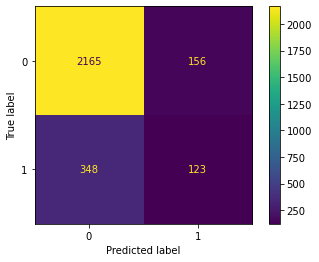

In [36]:
log_cm = confusion_matrix(y_test, y_pred, labels = log_clf.classes_)

log_disp = ConfusionMatrixDisplay(log_cm, display_labels = log_clf.classes_)

log_disp.plot(values_format = '')

plt.show()

In [37]:
# Create classification report for logistic regression model
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names = target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.90      2321
    Predicted would leave       0.44      0.26      0.33       471

                 accuracy                           0.82      2792
                macro avg       0.65      0.60      0.61      2792
             weighted avg       0.79      0.82      0.80      2792



In [38]:
# Decision Tree

y = df_enc['left']

X = df_enc.drop('left', axis  =1)



In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.25, stratify = y, random_state = 0)

In [40]:
tree = DecisionTreeClassifier(random_state = 0)

cv_params = {'max_depth' : [4, 6, 8, None],
            'min_samples_leaf' : [2, 5, 1],
            'min_samples_split' : [2, 4, 6]
            }

scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

tree1 = GridSearchCV(tree, cv_params, cv = 4, scoring = scoring, refit = 'roc_auc')

In [41]:
%%time

tree1.fit(X_train, y_train)

CPU times: user 2.94 s, sys: 0 ns, total: 2.94 s
Wall time: 2.94 s


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                

In [42]:
tree1.best_params_

{'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [43]:
tree1.best_score_

0.969819392792457

In [44]:
tree1.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [45]:
def make_results(model_name : str, model_object, metric :str):
    
    metric_dict = {'auc' : 'mean_test_roc_auc',
                  'precision' : 'mean_test_precision',
                  'recall' : 'mean_test_recall',
                  'f1' : 'mean_test_f1',
                  'accuracy' : 'mean_test_accuracy'
                  }
    
    cv_results = pd.DataFrame(model_object.cv_results_)
    
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]
    
    auc = best_estimator_results.mean_test_roc_auc
    precision = best_estimator_results.mean_test_precision
    recall = best_estimator_results.mean_test_recall
    f1 = best_estimator_results.mean_test_f1
    accuracy = best_estimator_results.mean_test_accuracy
    
    table = pd.DataFrame()
    table = pd.DataFrame({'model' : [model_name],
                         'precision' : [precision],
                         'recall' : [recall],
                         'f1' : [f1],
                         'accuracy' : [accuracy],
                         'auc' : [auc]
                         })
    
    return table
    
    

In [46]:
tree1_cv_results = make_results('decision tree cv', tree1, 'auc')
tree1_cv_results

,model,precision,recall,f1,accuracy,auc
0,decision tree cv,0.914552,0.916949,0.915707,0.971978,0.969819


In [47]:
#Random Forest

rf = RandomForestClassifier(random_state = 0)

cv_params = {'max_depth' : [3, 5, None],
            'max_features' : [0.1],
            'min_samples_leaf' : [1,2,3],
            'min_samples_split' : [2,3,4],
            'max_samples': [0.7,1.0],
            'n_estimators' : [300,500]
            }

scoring = {'precision', 'recall', 'f1', 'accuracy', 'roc_auc'}

rf1 = GridSearchCV(rf, cv_params, scoring = scoring, cv = 4, refit = 'roc_auc')

In [48]:
%%time

rf1.fit(X_train, y_train)

CPU times: user 3min 45s, sys: 0 ns, total: 3min 45s
Wall time: 3min 45s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [49]:
rf1.best_params_

{'max_depth': None,
 'max_features': 0.1,
 'max_samples': 0.7,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 500}

In [50]:
rf1.best_score_

0.9784305907203242

In [51]:
rf1_cv_results = make_results('random forest cv', rf1, 'auc')

print(tree1_cv_results)
print(rf1_cv_results)

              model  precision    recall        f1  accuracy       auc
0  decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819
              model  precision    recall        f1  accuracy       auc
0  random forest cv   0.978657  0.862694  0.916995  0.974091  0.978431


In [52]:
def get_scores(model_name : str, model, X_test_data, y_test_data):
    
    preds = model.best_estimator_.predict(X_test_data)
    
    auc = roc_auc_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    
    table = pd.DataFrame({'model' : [model_name],
                         'AUC' : [auc],
                         'precision' : [precision],
                         'recall' : [recall],
                         'f1' : [f1],
                         'accuracy' : [accuracy]
                         })
    
    return table

In [53]:
rf1_test_scores = get_scores('random forest1 test', rf1, X_test, y_test)
rf1_test_scores

,model,AUC,precision,recall,f1,accuracy
0,random forest1 test,0.936551,0.986425,0.875502,0.92766,0.977318


In [54]:
#Feature Engineering

df2 = df_enc.drop('satisfaction_level', axis = 1)

df2.head()

,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [55]:
print('Max hours worked: ', df2['average_monthly_hours'].max() )
print('Min hours worked: ', df2['average_monthly_hours'].min())

Max hours worked:  310
Min hours worked:  96


In [56]:
df2['overworked'] = df2['average_monthly_hours'] 

df2['overworked'] = (df2['overworked'] > 175).astype(int)

df2['overworked'].head()

0    0
1    1
2    1
3    1
4    0
Name: overworked, dtype: int64

In [57]:
df2 = df2.drop('average_monthly_hours', axis = 1)

df2.head()

,last_evaluation,number_project,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,0.53,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0.86,5,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
2,0.88,7,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
3,0.87,5,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0.52,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [58]:
y = df2['left']

X = df2.drop('left', axis = 1)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0, stratify = y)

In [60]:
tree = DecisionTreeClassifier(random_state = 0)

cv_params = {'max_depth' : [4, 6, 8, None],
            'min_samples_leaf' : [2, 5 , 1],
            'min_samples_split' : [2, 4, 6]
            }

scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

tree2 = GridSearchCV(tree, cv_params, scoring = scoring, cv =4, refit = 'roc_auc')

In [61]:
%%time

tree2.fit(X_train, y_train)

CPU times: user 2.74 s, sys: 0 ns, total: 2.74 s
Wall time: 2.74 s


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                

In [62]:
tree2.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 6}

In [63]:
tree2.best_score_

0.9586752505340426

In [64]:
tree2_cv_results = make_results('Decision Tree2 cv', tree2, 'auc')
print(tree1_cv_results)
print(tree2_cv_results)

              model  precision    recall        f1  accuracy       auc
0  decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819
               model  precision    recall        f1  accuracy       auc
0  Decision Tree2 cv   0.856693  0.903553  0.878882  0.958523  0.958675


In [65]:
rf = RandomForestClassifier(random_state = 0)

cv_params = {'max_depth': [3,5,None],
            'max_features' : [1.0],
            'min_samples_leaf' : [1,2,3],
            'min_samples_split' : [2,3,4],
            'n_estimators': [300,500],
             'max_samples' : [0.7,1.0]
            }

scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

rf2 = GridSearchCV(rf, cv_params, scoring = scoring, cv = 4, refit = 'roc_auc')

In [66]:
%%time

rf2.fit(X_train,y_train)

CPU times: user 7min 12s, sys: 0 ns, total: 7min 12s
Wall time: 7min 12s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [67]:
rf2.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

In [68]:
rf2.best_score_

0.9648100662833985

In [69]:
rf2_cv_results = make_results('random forest2 cv', rf2, 'auc')

print(tree2_cv_results)
print(rf2_cv_results)

               model  precision    recall        f1  accuracy       auc
0  Decision Tree2 cv   0.856693  0.903553  0.878882  0.958523  0.958675
               model  precision    recall        f1  accuracy      auc
0  random forest2 cv   0.866758  0.878754  0.872407  0.957411  0.96481


In [70]:
rf2_test_scores = get_scores('random forest2 test', rf2, X_test, y_test)
rf2_test_scores

,model,AUC,precision,recall,f1,accuracy
0,random forest2 test,0.938407,0.870406,0.903614,0.8867,0.961641


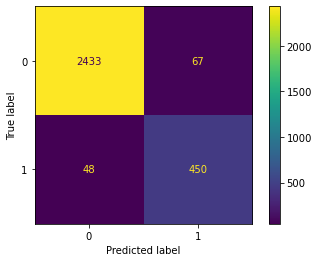

In [71]:
preds = rf2.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, preds,labels = rf2.classes_ )

disp = ConfusionMatrixDisplay(cm, display_labels = rf2.classes_)

disp.plot(values_format = '')

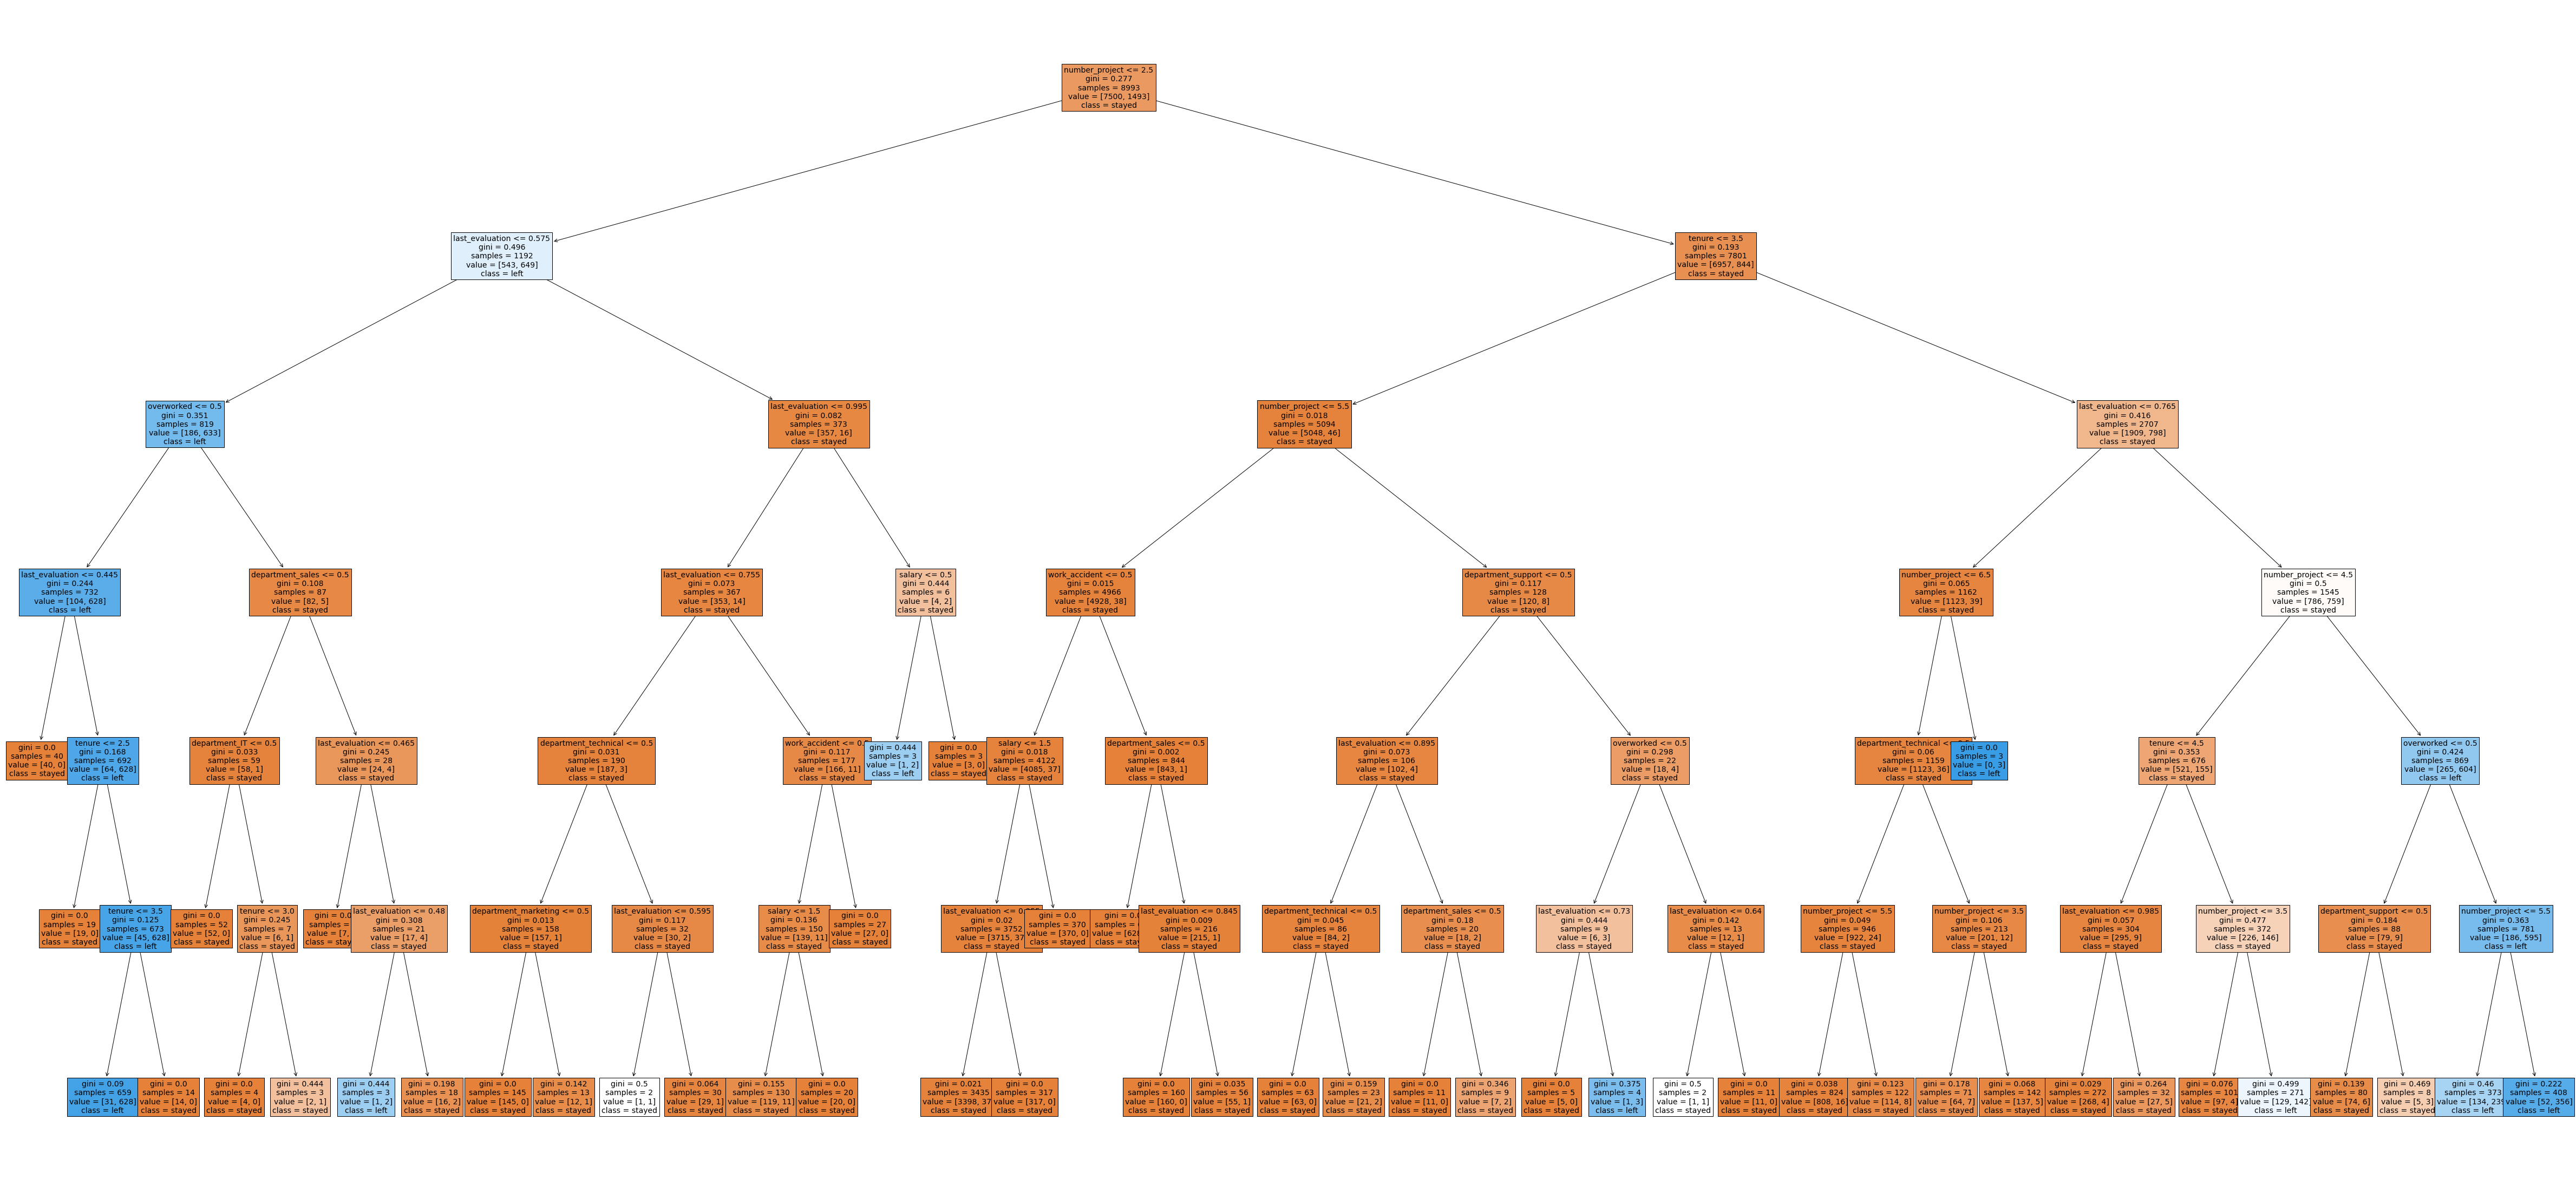

In [72]:
plt.figure(figsize = (85,40))

plot_tree(tree2.best_estimator_, max_depth = 6, filled = True, feature_names = X.columns, class_names = {0 : 'stayed', 1 :'left'},fontsize = 14)

plt.show()

In [73]:
tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, columns = ['gini_importance'],
                               index = X.columns)

tree2_importances = tree2_importances.sort_values(by = 'gini_importance' , ascending = False)

tree2_importances = tree2_importances[tree2_importances['gini_importance'] != 0]
tree2_importances

,gini_importance
last_evaluation,0.343958
number_project,0.343385
tenure,0.215681
overworked,0.093498
department_support,0.001142
salary,0.000910
department_sales,0.000607
department_technical,0.000418
work_accident,0.000183
department_IT,0.000139


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

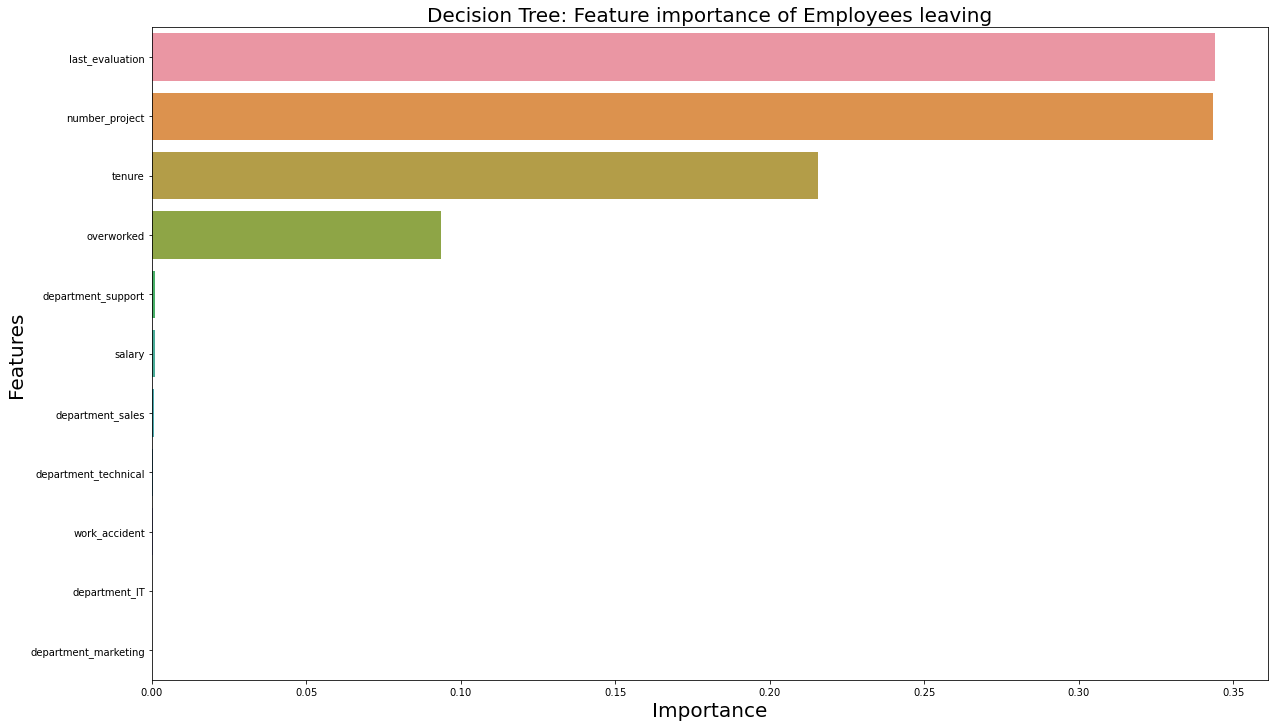

In [74]:
plt.figure(figsize = (20,12))

sns.barplot(data = tree2_importances, x = 'gini_importance', y = tree2_importances.index, orient = 'h')

plt.title("Decision Tree: Feature importance of Employees leaving", fontsize = 20)
plt.ylabel("Features", fontsize = 20)
plt.xlabel("Importance", fontsize = 20)
plt.yticks()

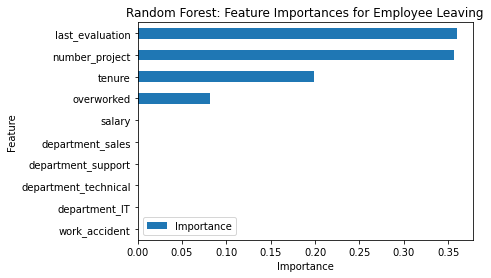

In [75]:
# Get feature importances
feat_impt = rf2.best_estimator_.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(rf2.best_estimator_.feature_importances_, -10)[-10:]

# Get column labels of top 10 features 
feat = X.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

In [76]:
    cv_results = pd.DataFrame(tree1.cv_results_)
    
    cv_results


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_roc_auc,split1_test_roc_auc,...,mean_test_f1,std_test_f1,rank_test_f1,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy
0,0.009028,0.000983,0.006687,0.000410,4,2,2,"{'max_depth': 4, 'min_samples_leaf': 2, 'min_s...",0.966357,0.970757,...,0.916627,0.001947,25,0.972432,0.972865,0.971530,0.972420,0.972312,0.000485,25
1,0.008479,0.000210,0.006656,0.000200,4,2,4,"{'max_depth': 4, 'min_samples_leaf': 2, 'min_s...",0.966357,0.970757,...,0.916627,0.001947,25,0.972432,0.972865,0.971530,0.972420,0.972312,0.000485,25
2,0.008457,0.000151,0.006684,0.000441,4,2,6,"{'max_depth': 4, 'min_samples_leaf': 2, 'min_s...",0.966357,0.970757,...,0.916627,0.001947,25,0.972432,0.972865,0.971530,0.972420,0.972312,0.000485,25
3,0.008156,0.000076,0.006398,0.000042,4,5,2,"{'max_depth': 4, 'min_samples_leaf': 5, 'min_s...",0.966266,0.970757,...,0.915707,0.002325,31,0.971988,0.972865,0.971085,0.971975,0.971978,0.000629,31
4,0.008170,0.000088,0.006285,0.000064,4,5,4,"{'max_depth': 4, 'min_samples_leaf': 5, 'min_s...",0.966266,0.970757,...,0.915707,0.002325,31,0.971988,0.972865,0.971085,0.971975,0.971978,0.000629,31
5,0.008129,0.000078,0.006348,0.000102,4,5,6,"{'max_depth': 4, 'min_samples_leaf': 5, 'min_s...",0.966266,0.970757,...,0.915707,0.002325,31,0.971988,0.972865,0.971085,0.971975,0.971978,0.000629,31
6,0.008307,0.000089,0.006530,0.000155,4,1,2,"{'max_depth': 4, 'min_samples_leaf': 1, 'min_s...",0.966357,0.969851,...,0.916319,0.002449,28,0.972432,0.972865,0.971085,0.972420,0.972201,0.000668,28
7,0.008975,0.001122,0.006474,0.000104,4,1,4,"{'max_depth': 4, 'min_samples_leaf': 1, 'min_s...",0.966357,0.969851,...,0.916319,0.002449,28,0.972432,0.972865,0.971085,0.972420,0.972201,0.000668,28
8,0.009591,0.001196,0.008128,0.001124,4,1,6,"{'max_depth': 4, 'min_samples_leaf': 1, 'min_s...",0.966357,0.969851,...,0.916319,0.002449,28,0.972432,0.972865,0.971085,0.972420,0.972201,0.000668,28
9,0.012218,0.001439,0.006698,0.000170,6,2,2,"{'max_depth': 6, 'min_samples_leaf': 2, 'min_s...",0.951584,0.973062,...,0.939421,0.008411,12,0.978213,0.983096,0.977313,0.983096,0.980429,0.002686,12


# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

[Double-click to enter your summary here.]

### Conclusion, Recommendations, Next Steps

[Double-click to enter your conclusion, recommendations, and next steps here.]

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.